 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [23]:
# Initial imports
#GOOGLEFINANCE function did not work so I will be using the appl, cost and goog portfolio given to me 
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [24]:
# Reading whale returns
whales_path = Path("../Starter_Code/Resources/whale_returns.csv")
whales_df = pd.read_csv(whales_path, index_col = ["Date"], infer_datetime_format = True, parse_dates = True)
whales_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [25]:
# Count nulls
whales_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [26]:
# Drop nulls
whales_cleaned_df = whales_df.dropna()

whales_cleaned_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [27]:
# Reading algorithmic returns
algo_path = Path("../Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col = ["Date"], infer_datetime_format = True, parse_dates = True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [28]:
# Count null
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [29]:
# Drop nulls
algo_cleaned_df = algo_df.dropna()

algo_cleaned_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [30]:
# Reading S&P 500 Closing Prices
sp500_path = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col = ["Date"], infer_datetime_format = True, parse_dates = True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [31]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [32]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].astype(str).str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype(str).str.replace(",", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

C:\Users\Eamonn\AppData\Local\Temp\ipykernel_14692\777882380.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].astype(str).str.replace("$", "")


Close    float64
dtype: object

In [33]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [34]:
# Drop nulls
sp500_returns = sp500_returns.dropna().copy()
sp500_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [35]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns ={"Close": "S&P500"})
sp500_returns.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [36]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios = pd.concat([whales_cleaned_df, algo_cleaned_df, sp500_returns], axis ="columns", join="inner")
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot: title={'center': 'Daily Returns'}, xlabel='Date'>

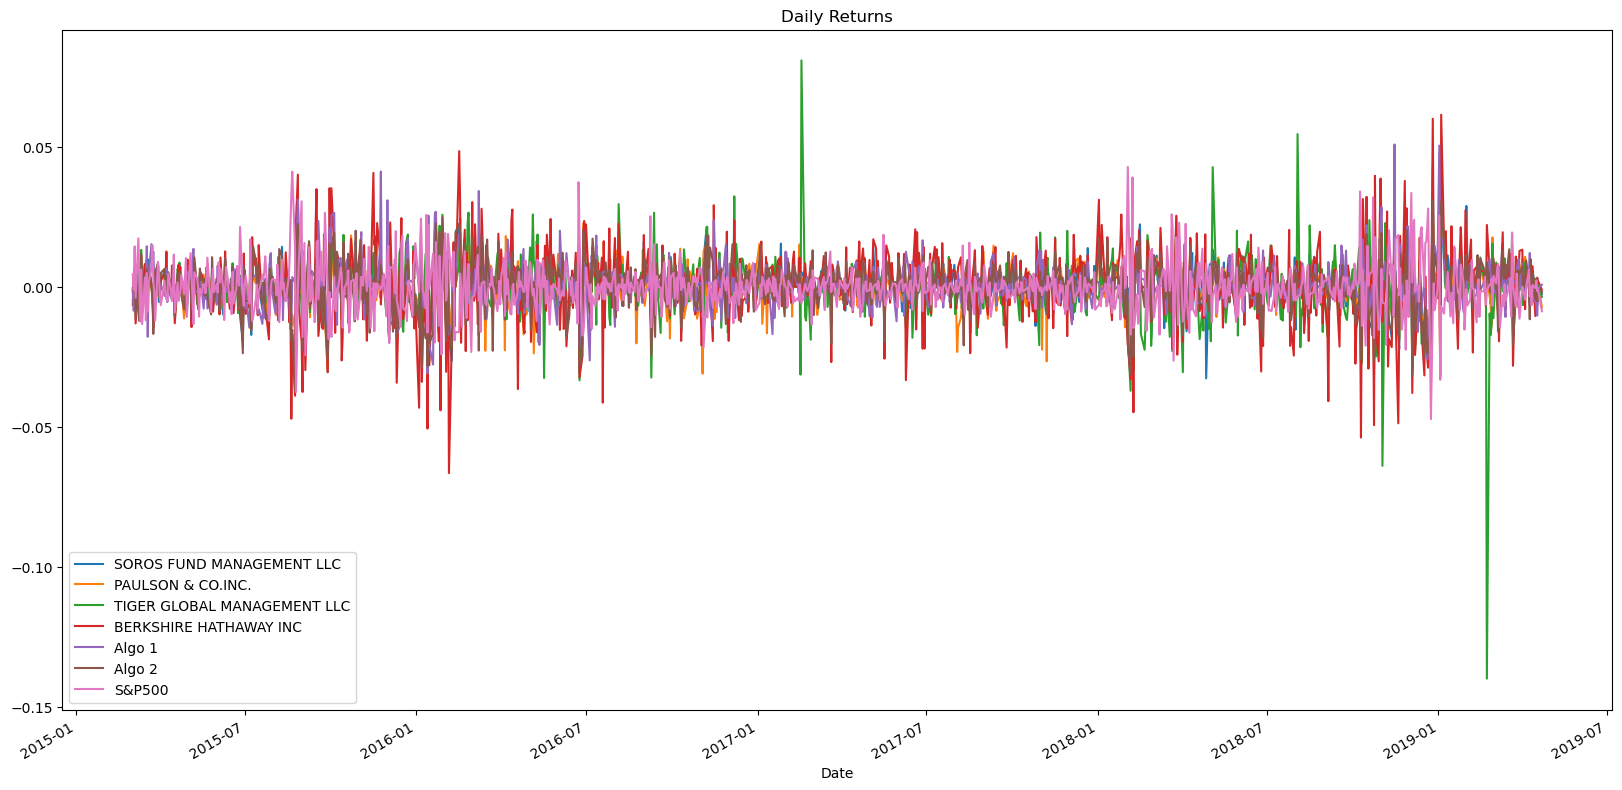

In [37]:
# Plot daily returns of all portfolios
all_portfolios.plot(figsize=(20,10), title = "Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot: title={'center': 'Cumulative Returns'}, xlabel='Date'>

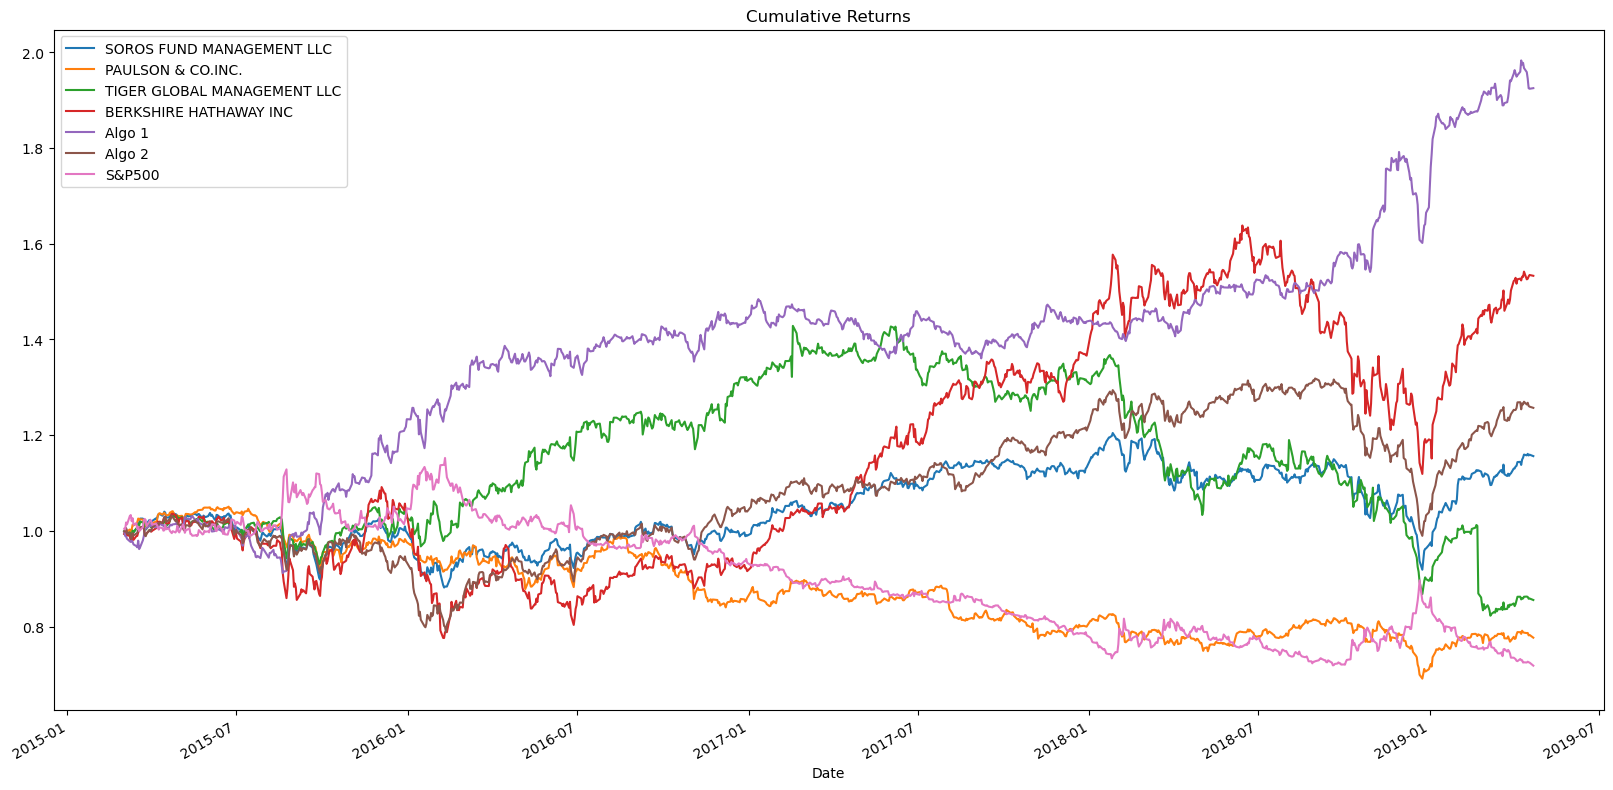

In [38]:
# Calculate cumulative returns of all portfolios
cumulative_returns = ( 1 + all_portfolios).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot: title={'center': 'Portfolio Risk'}>

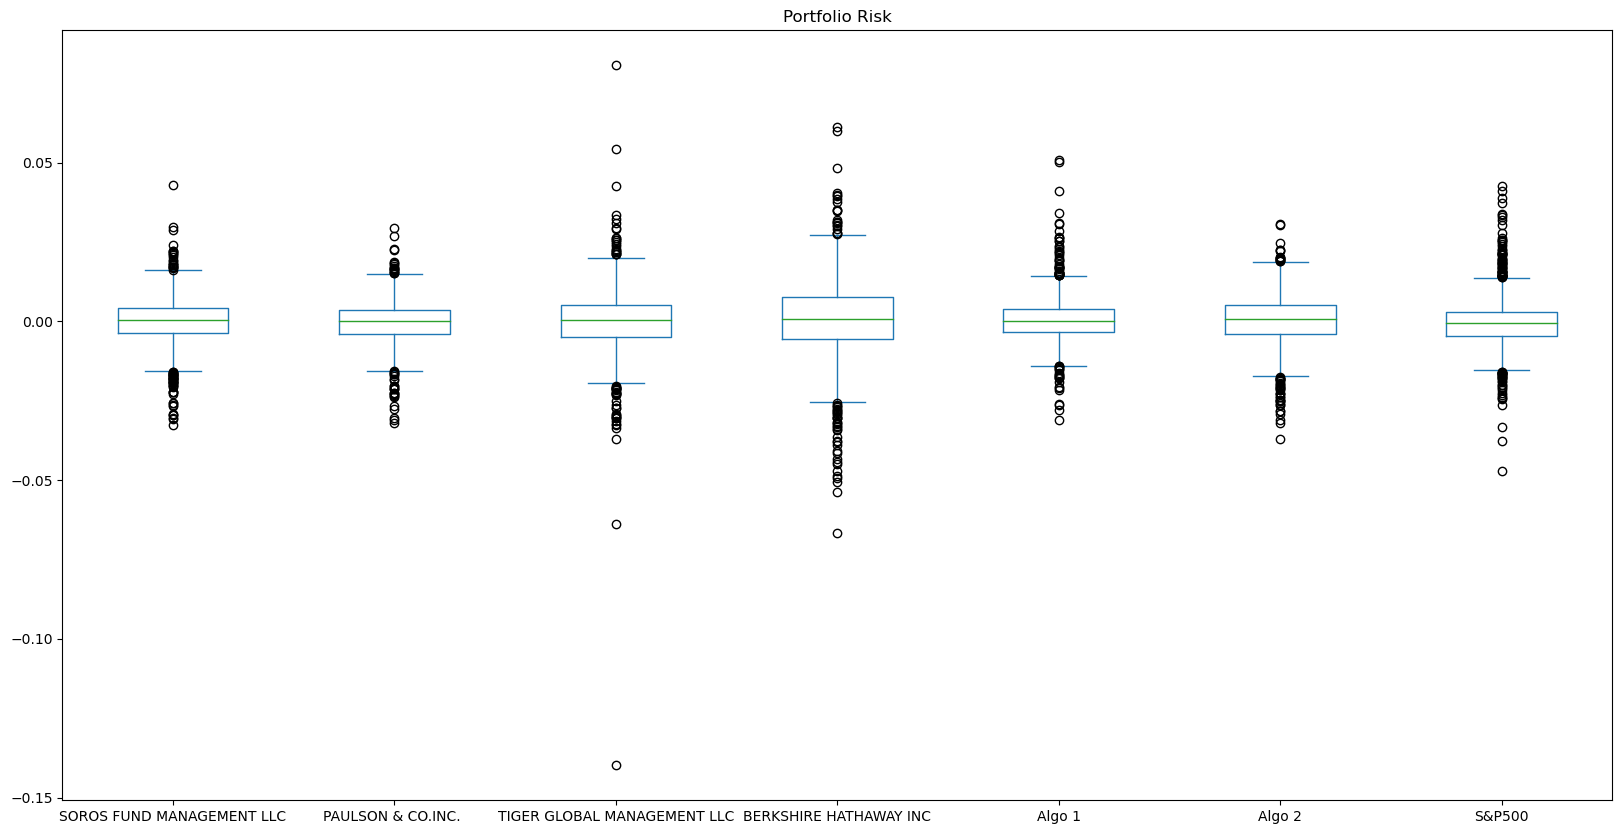

In [39]:
# Box plot to visually show risk
all_portfolios.plot.box(figsize=(20,10), title ="Portfolio Risk")

### Calculate Standard Deviations

In [40]:
# Calculate the daily standard deviations of all portfolios
all_portfolios.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P500                         0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [43]:
# Calculate  the daily standard deviation of S&P 500
sp500_risk = all_portfolios["S&P500"].std()
# Determine which portfolios are riskier than the S&P 500
all_portfolios.std() > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P500                         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = all_portfolios.std() * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P500                         0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot: title={'center': '21 Day Rolling Standard Dev'}, xlabel='Date'>

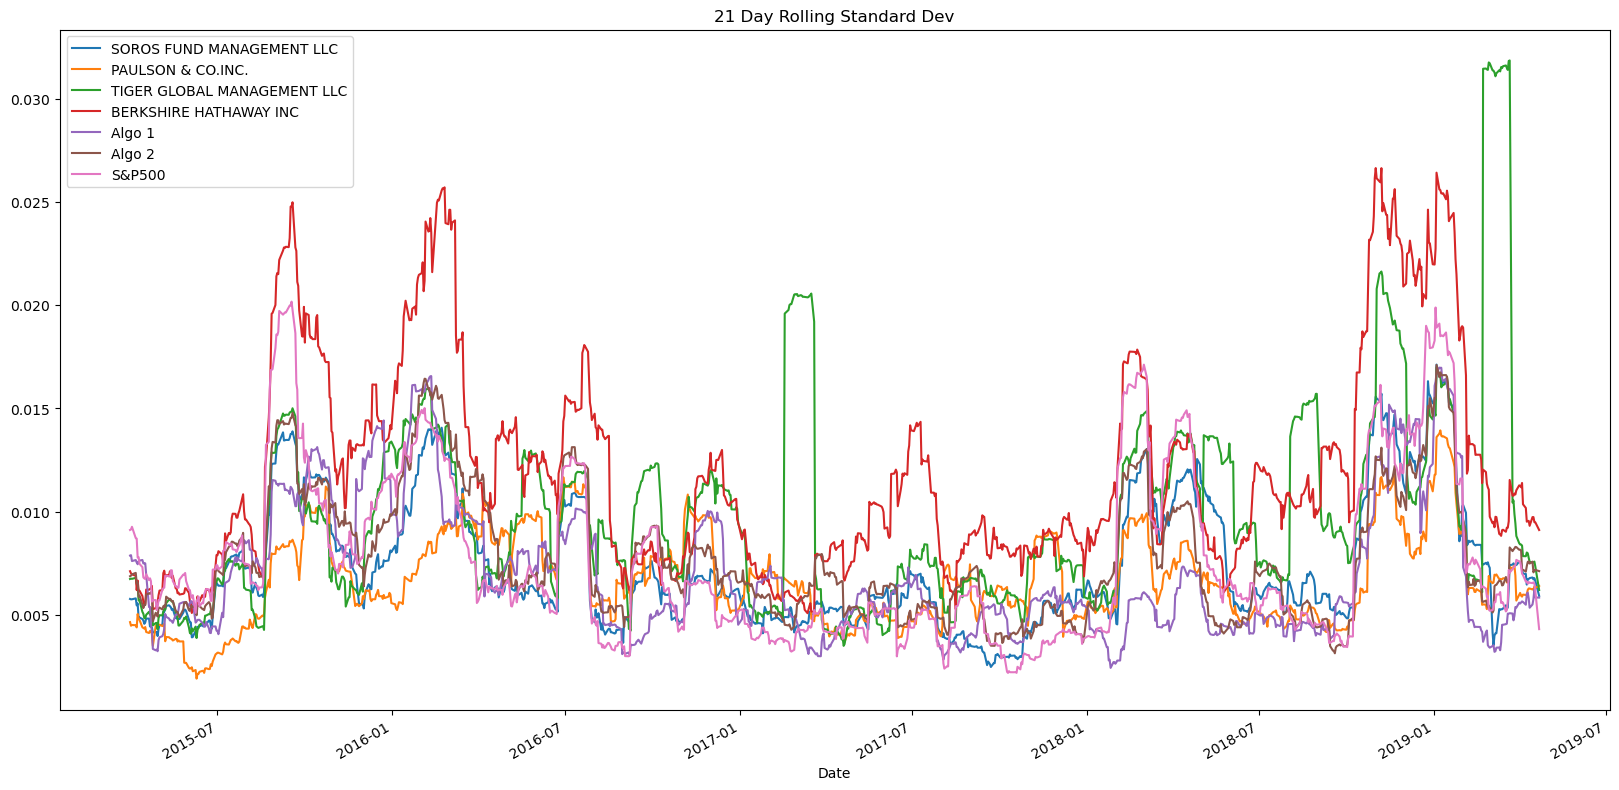

In [45]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_roll_std = all_portfolios.rolling(window=21).std()
# Plot the rolling standard deviation
all_portfolios_roll_std.plot(figsize=(20,10), title="21 Day Rolling Standard Dev")

### Calculate and plot the correlation

In [46]:
# Calculate the correlation
corr_df = all_portfolios.corr()
# Display de correlation matrix
corr_df.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot: title={'center': 'Berkshire Hathaway Incs. Beta'}, xlabel='Date'>

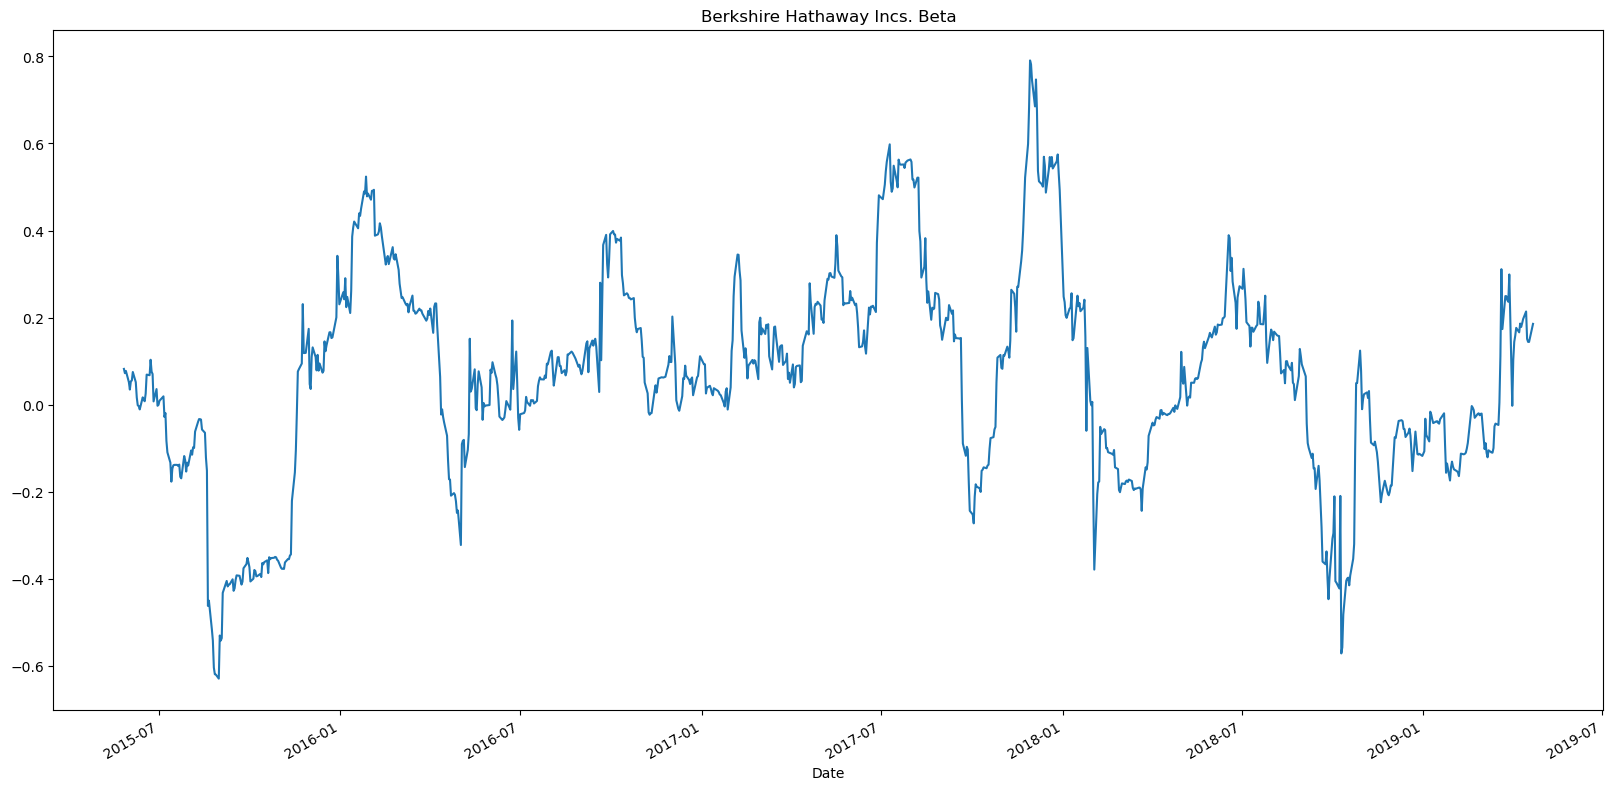

In [48]:
# Calculate covariance of a single portfolio
covariance = all_portfolios["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(all_portfolios["S&P500"])
# Calculate variance of S&P 500
variance = all_portfolios["S&P500"].rolling(60).var()
# Computing beta
beta = covariance / variance 
# Plot beta trend
beta.plot(figsize=(20,10), title="Berkshire Hathaway Incs. Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot: title={'center': 'Exponentially Weighted Average'}, xlabel='Date'>

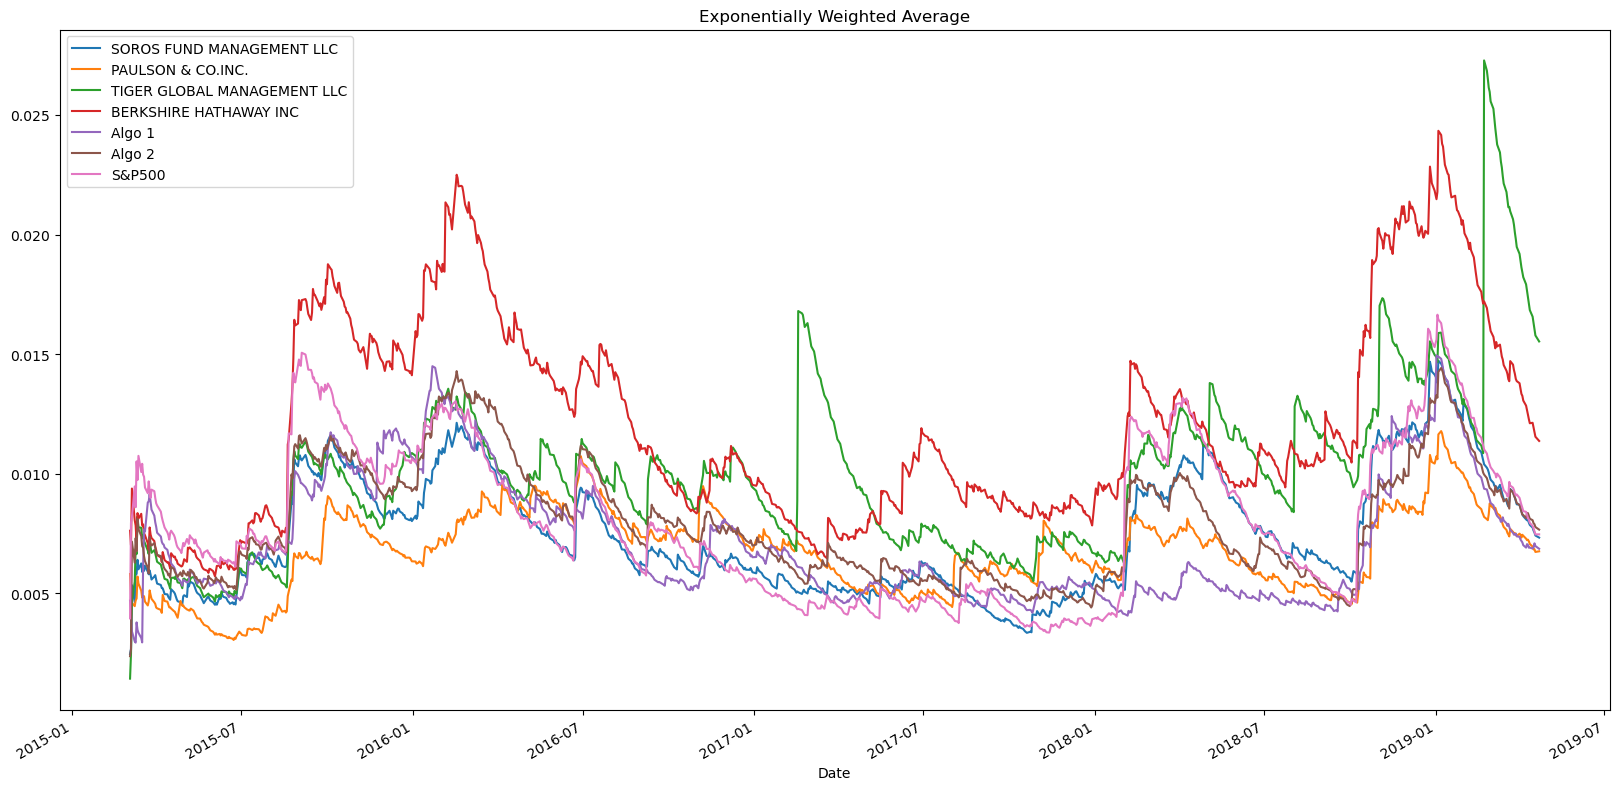

In [49]:
# Use `ewm` to calculate the rolling window
all_portfolios.ewm(halflife=21).std().plot(figsize=(20,10), title="Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                        -0.518582
dtype: float64

<AxesSubplot: title={'center': 'Sharpe Ratios'}>

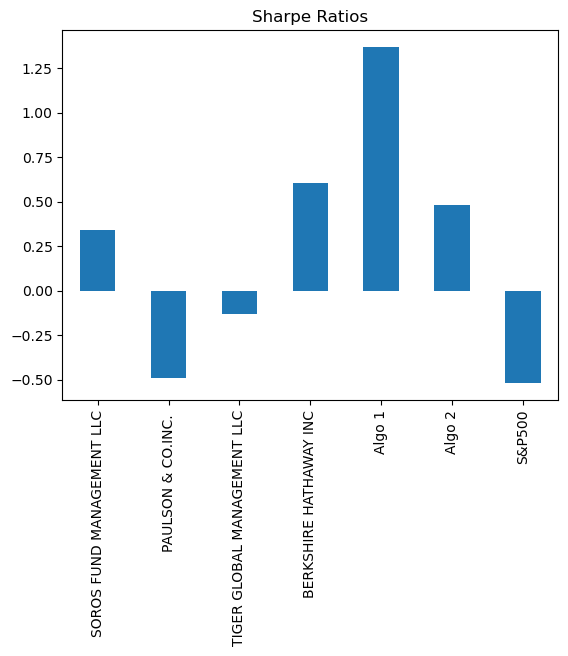

In [51]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---The algorithms do outperfomr the market and whales portfolios since their sharpe ratios are higher than all of them. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [56]:
# Reading data from 1st stock
google_historical_csv = Path("Resources/goog_historical.csv")
google_historical = pd.read_csv(google_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google_historical = google_historical.sort_index()
google_historical.head() 

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [57]:
# Reading data from 2nd stock
apple_historical_csv = Path("Resources/aapl_historical.csv")
apple_historical = pd.read_csv(apple_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple_historical = apple_historical.sort_index()
apple_historical.head() 

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [81]:
# Reading data from 3rd stock
costco_historical_csv = Path("Resources/cost_historical.csv")
costco_historical = pd.read_csv(costco_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
costco_historical = costco_historical.sort_index()
costco_historical.head() 

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [82]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([google_historical, apple_historical, costco_historical], axis ="rows", join="inner")
all_stocks.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [83]:
# Reset Date index
all_stocks = all_stocks.reset_index()
all_stocks.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [84]:
# Reorganize portfolio data by having a column per symbol
portfolio = all_stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [85]:
# Calculate daily returns
daily_returns = portfolio.pct_change()
# Drop NAs
dailt_returns = daily_returns.dropna().copy()
# Display sample data
daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [86]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data
portfolio_returns.head 

<bound method NDFrame.head of Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 250, dtype: float64>

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [76]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios["Custom"] = portfolio_returns
all_portfolios.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom
Date,,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.001217


In [77]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios = all_portfolios.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [78]:
# Calculate the annualized `std`
risk = all_portfolios.std() * np.sqrt(252)
risk

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
S&P500                         0.152469
Custom                         0.211627
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot: title={'center': '21 Day Rolling Standard Dev'}, xlabel='Date'>

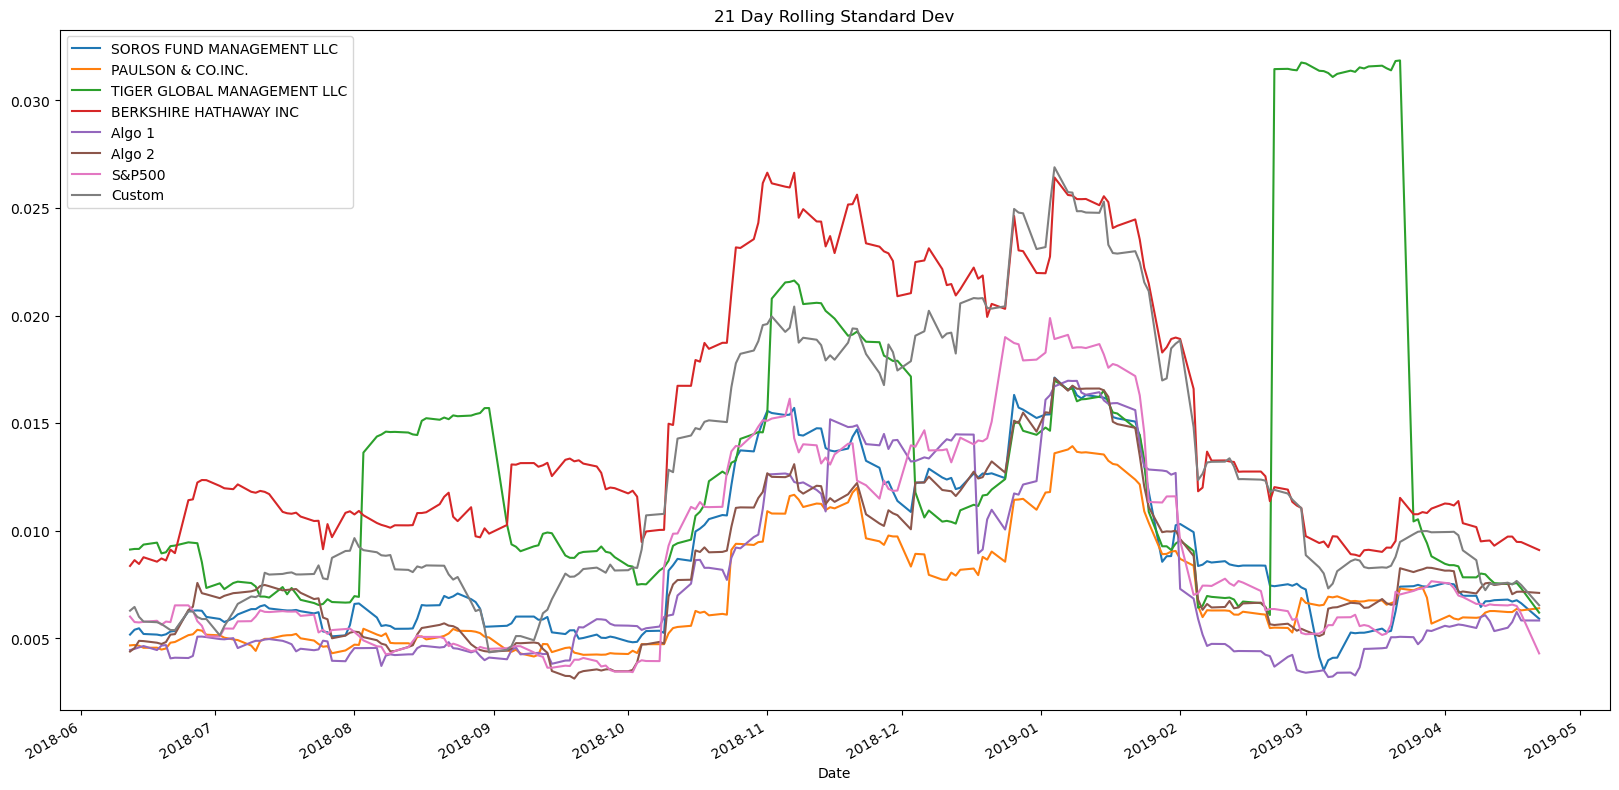

In [80]:
# Calculate rolling standard deviation
rolling_std_dev = all_portfolios.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std_dev.plot(figsize=(20,10), title="21 Day Rolling Standard Dev")

### Calculate and plot the correlation

In [87]:
# Calculate and plot the correlation
df = all_portfolios.corr()
df.style.background_gradient(cmap="bwr")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.732548
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.390961
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.800558
Algo 1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.260331
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.739020
S&P500,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,0.005603
Custom,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot: title={'center': 'Custom Beta'}, xlabel='Date'>

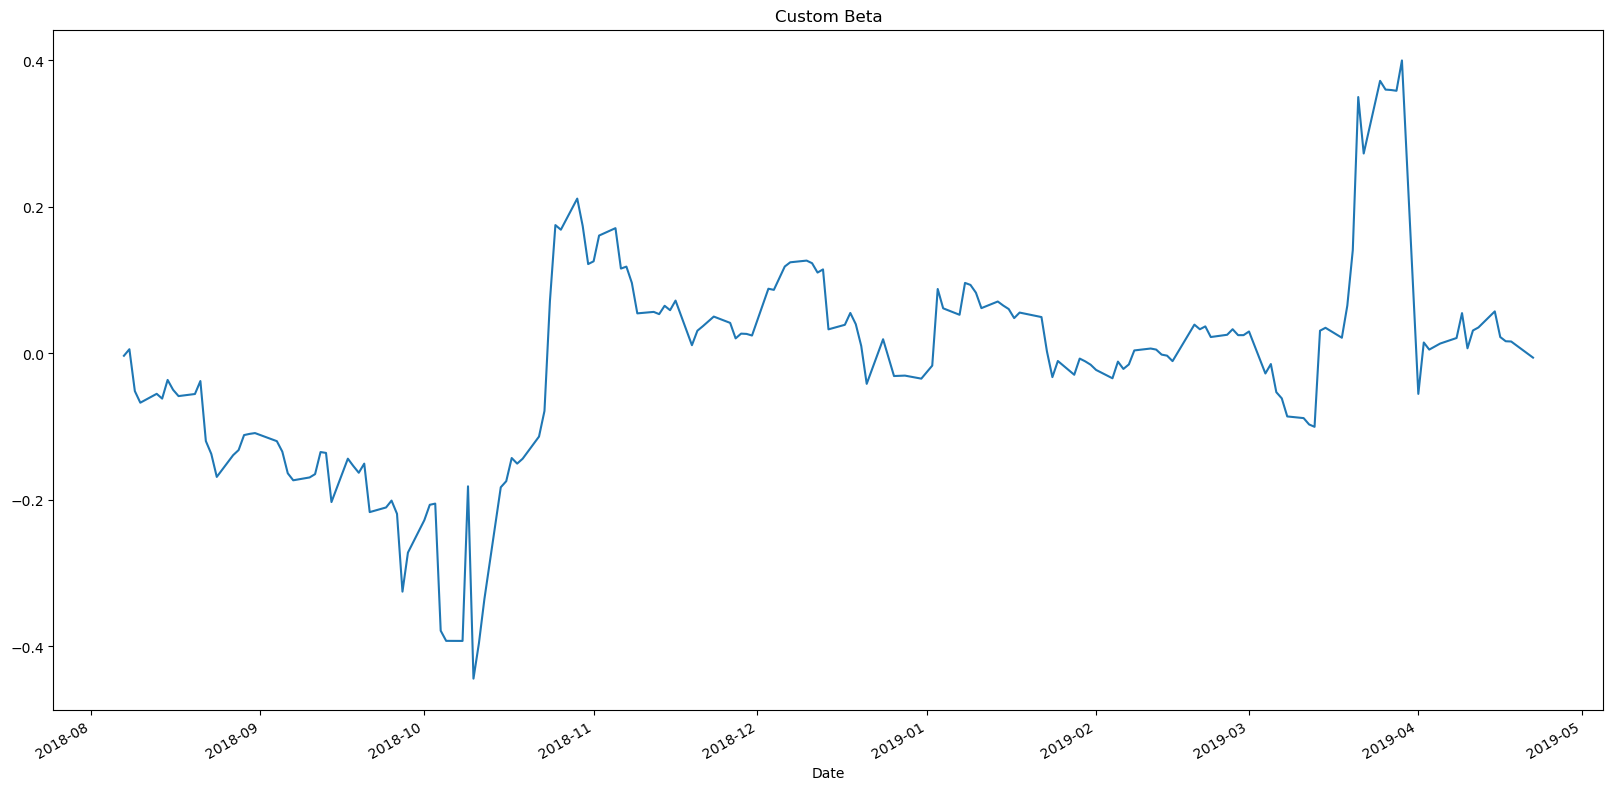

In [92]:
# Calculate and plot Beta
covariance = all_portfolios["Custom"].rolling(window=60).cov(all_portfolios["S&P500"])
variance = all_portfolios["S&P500"].rolling(60).var()
# Computing beta
beta = covariance / variance 
# Plot beta trend
beta.plot(figsize=(20,10), title="Custom Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [93]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
S&P500                        -0.427676
Custom                         0.876152
dtype: float64

<AxesSubplot: title={'center': 'Sharpe Ratios'}>

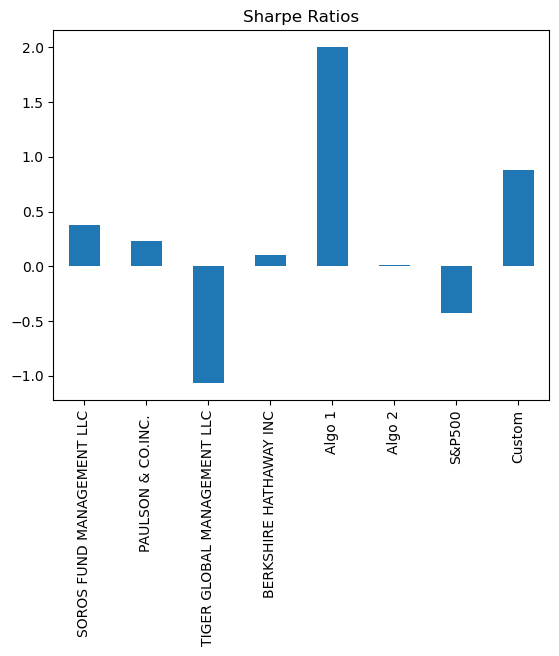

In [90]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
#Pretty well considering it only got outperformed by only one other portfolio(Algo 1) and it nearly has a sharpe ratio of 1 